In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.  

In [2]:
claim = pd.read_csv('claims.csv')
cust = pd.read_csv('cust_demographics.csv')
print(cust.head(1))
print(claim.head(1))

    CUST_ID  gender DateOfBirth State       Contact   Segment
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum
   claim_id  customer_id incident_cause  claim_date claim_area police_report  \
0  54004764     21868593   Driver error  11/27/2017       Auto            No   

      claim_type claim_amount  total_policy_claims fraudulent  
0  Material only        $2980                  1.0         No  


In [3]:
df = pd.merge(left = cust,
              right = claim[['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
                            'police_report', 'claim_type', 'claim_amount', 'total_policy_claims', 'fraudulent']],
              left_on = ['CUST_ID'],
              right_on = ['customer_id'],
              how = 'inner',
              indicator = True)

In [4]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,both
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,both
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,both


 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
df.drop(['_merge'], inplace = True, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 144.1+ KB


In [7]:
df.drop(['CUST_ID'], inplace = True, axis=1)

In [8]:
df.shape

(1085, 15)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_id,1085.0,4.891553e+07,2.912818e+07,26832.0,24046062.0,48559754.0,74043997.0,99775483.0
customer_id,1085.0,5.076790e+07,2.849625e+07,154557.0,26450621.0,49759488.0,76093960.0,99961993.0
total_policy_claims,1075.0,1.586977e+00,1.146859e+00,1.0,1.0,1.0,2.0,8.0


In [10]:
#Detailed profiling using pandas profiling
import pandas_profiling 

pandas_profiling.ProfileReport(df)

 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [11]:
df['claim_amount'] = df.claim_amount.str.replace('$', '')
df['claim_amount'] = df['claim_amount'].astype(float)
df['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
5        1440.0
6        2680.0
7        2240.0
8       38306.5
9       36810.0
10       1730.0
11       1160.0
12       2620.0
13       2748.5
14       1495.0
15      16690.0
16       1870.0
17       1050.0
18      32560.0
19       2870.0
20       3208.5
21      17800.0
22      31380.0
23      36190.0
24          NaN
25       1010.0
26          NaN
27      16830.0
28       1690.0
29       2830.0
         ...   
1055     2420.0
1056     1720.0
1057    31210.0
1058     1670.0
1059     2162.0
1060     2242.5
1061    25140.0
1062    37743.0
1063     1150.0
1064    20630.0
1065     1230.0
1066     2323.0
1067     1090.0
1068    44033.5
1069     2670.0
1070     2070.0
1071     1050.0
1072    38950.0
1073     2730.0
1074    33330.0
1075     2780.0
1076     1380.0
1077     2290.0
1078     2320.0
1079     2173.5
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Leng

4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims. 

In [12]:
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No


In [13]:
from numpy import where as IF
df['police_report'] = IF((df.police_report == 'Yes'), 1,
                         IF((df.police_report == 'No'), 0, 'Unknown'))

In [14]:
df['police_report'].head()

0          0
1    Unknown
2          0
3          0
4          0
Name: police_report, dtype: object

5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [15]:
df.claim_date = pd.to_datetime(df.claim_date)
df.DateOfBirth = pd.to_datetime(df.DateOfBirth)

In [16]:
# first sorting by date of claims so that most claims are sorted in ascending order of date
df.sort_values('claim_date', inplace = True)

In [17]:
df.drop_duplicates(subset=['customer_id','claim_area'], keep='last', inplace=False)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
177,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,0,Material only,2080.0,1.0,No
181,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,0,Material and injury,30930.0,1.0,No
312,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,0,Material and injury,37290.0,3.0,No
905,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,0,Injury only,27670.0,1.0,No
120,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,0,Material only,2967.0,1.0,Yes
383,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,0,Material only,2900.0,2.0,No
334,Male,1982-10-09,FL,462-823-3126,Silver,70512964,22756942,Driver error,2017-01-01,Auto,1,Injury only,20310.0,1.0,No
231,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,0,Material and injury,20200.0,1.0,No
195,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No
1064,Female,1987-10-09,ME,951-941-3975,Platinum,56358443,75934330,Natural causes,2017-01-01,Auto,1,Injury only,20630.0,1.0,No


6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical) 

In [18]:
df.dtypes

gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [19]:
df.count()

gender                 1085
DateOfBirth            1085
State                  1085
Contact                1085
Segment                1085
claim_id               1085
customer_id            1085
incident_cause         1085
claim_date             1085
claim_area             1085
police_report          1085
claim_type             1085
claim_amount           1020
total_policy_claims    1075
fraudulent             1085
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 177 to 1055
Data columns (total 15 columns):
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 135.6+ KB


In [21]:
print(df.isnull().any())

print(df.isnull().any().sum())

gender                 False
DateOfBirth            False
State                  False
Contact                False
Segment                False
claim_id               False
customer_id            False
incident_cause         False
claim_date             False
claim_area             False
police_report          False
claim_type             False
claim_amount            True
total_policy_claims     True
fraudulent             False
dtype: bool
2


In [22]:
# as both are continous variables will use mean for both
df = df.fillna(df.mean()['claim_amount' : 'total_policy_claims'])

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria:
    - Children < 18 
    - Youth 18-30 
    - Adult 30-60 
    - Senior > 60 

In [23]:
import datetime as DT
import io

In [24]:
now = pd.Timestamp('now')
df['Age'] = (now - df['DateOfBirth']).astype('<m8[Y]') 

In [25]:
from numpy import where as IF
df['Age_Group']= IF((df.Age < 18), 'Children',
                  IF((df.Age > 18) & (df.Age < 30), 'Youth',
                     IF((df.Age > 30) & (df.Age < 60), 'Adult',
                        IF((df.Age > 60), 'Senior', 'Invalid'))))

8. What is the average amount claimed by the customers from various segments? 

In [26]:
#average amount claimed by each customers from various segments

In [27]:
df.groupby(['Segment', 'customer_id']).agg({'claim_amount' : ['mean']})

claim_amount
                             mean
Segment customer_id              
Gold    441097       37040.000000
        524545       35250.000000
        684748        2920.000000
        804961       21190.000000
        1924109       1690.000000
        2413612      12467.681373
        2476913      22130.000000
        2651069       1932.000000
        3497881      42021.000000
        4412055      37869.500000
        4652602       1320.000000
        5027573       1490.000000
        5264479      24220.000000
        5864769      34460.000000
        6104555       1050.000000
        6448629       2714.000000
        7208859       1840.000000
        7583158      19820.000000
        7612094       2771.500000
        7703371       1350.000000
        7946799      34971.500000
        7988398      14720.000000
        8039037       1210.000000
        8375366       2110.000000
        8684318       2670.000000
        8733543       2300.000000
        8765210      34200.000000
        9339845      12467.681373
        9466593       1472.000000
        9600820      29830.000000
...                           ...
Silver  89806715      1710.000000
        89808931      2750.000000
        89965541      2810.000000
        89986804     37380.000000
        90425966      2320.000000
        90718924     27560.000000
        90876878     13820.000000
        91136854      2240.000000
        91447671      1370.000000
        92072156      2970.000000
        92400577     12467.681373
        92752865     12467.681373
        92789350      1170.000000
        93133213      1480.000000
        93910149      1960.000000
        94041088      2645.000000
        94643289     45287.000000
        95221640      2040.000000
        95418320      2820.000000
        95452498      2219.500000
        95822358     16479.500000
        96134505     33522.500000
        96710523     19240.000000
        96795364      2250.000000
        97162684     20769.000000
        97545319     33520.000000
        98204394      1550.000000
        98401399     24900.000000
        99674324     21480.000000
        99761663      1242.000000

[1078 rows x 1 columns]

In [28]:
#average amount claimed by the customers from various segments

In [29]:
df1 = df.groupby(['Segment']).agg({'claim_amount' : ['mean']})
df1

,claim_amount
,mean
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


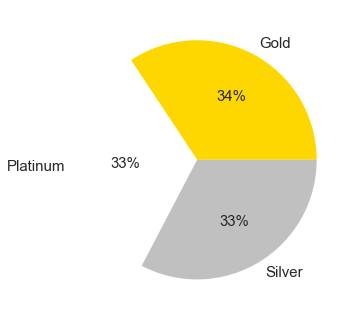

In [30]:
df1.plot(kind = "pie",colors=['gold', 'white', 'silver'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=15,subplots=True,legend=False)
plt.ylabel("") # to remove the unwanted Y axis label
plt.show()

9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018. 

In [31]:
df['days_prior'] = (df['claim_date'] <= '2018-10-30') & (df['claim_date'] > '2018-10-11')

In [32]:
df['claim_amount'][(df['days_prior'])].sum()

387637.2254901961

10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [33]:
array = ['TX', 'DE', 'AK']
table = df.loc[(df['Age_Group'] == 'Adult') & df['State'].isin(array) & df['incident_cause'].isin(['Driver error', 'Other driver error'])]

In [34]:
table.customer_id.count()

19

 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [35]:
driver_issues = df.where(df['incident_cause'].isin(['Driver error', 'Other driver error']))

In [36]:
df1 = df.groupby(['gender']).agg({'claim_amount' : ['sum']})

In [37]:
for_pieplot = df.groupby(['gender', 'Segment']).agg({'claim_amount' : 'sum'})
for_pieplot = for_pieplot.round(decimals=0)
for_pieplot = for_pieplot.stack()
for_pieplot = for_pieplot.unstack(level=0)
for_pieplot

,gender,Female,Male
Segment,,,
Gold,claim_amount,2109738.0,2701374.0
Platinum,claim_amount,2369484.0,2098303.0
Silver,claim_amount,1901912.0,2346624.0


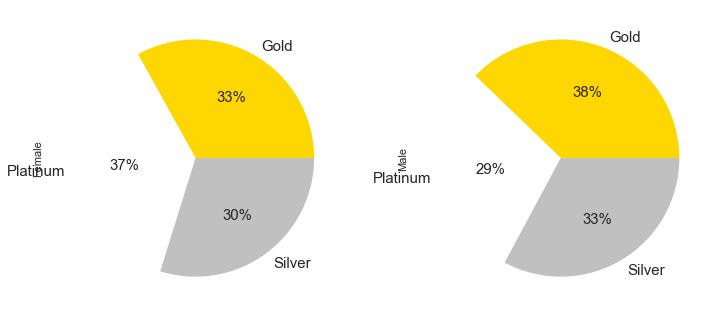

In [72]:
for_pieplot.plot(kind='pie',  
            labels=['Gold', 'Platinum', 'Silver'], 
            colors=['gold', 'white','silver'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=15, 
            legend=False,
            subplots= True,
            layout = (2,2),
            figsize=(12,12))

plt.ylabel('')
plt.show()

In [39]:
#second method of comparison

In [40]:
for_pieplot1 = for_pieplot.T

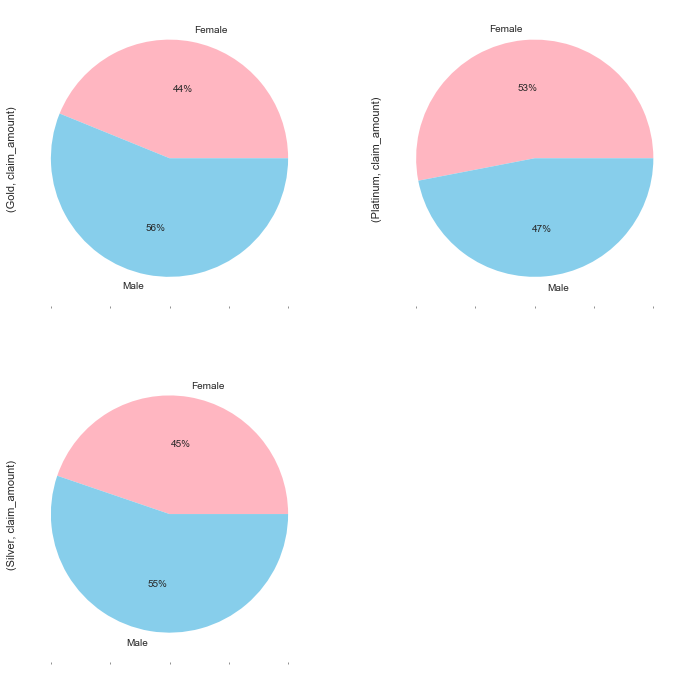

In [41]:
for_pieplot1.plot(kind='pie',  
            labels=['Female', 'Male'], 
            colors=['lightpink', 'skyblue'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            legend=False,
            subplots= True,
            layout = (2,2),
            figsize=(12,12))

plt.ylabel('')
plt.show()

12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart 

In [42]:
driver_issues = df.where(df['incident_cause'].isin(['Driver error', 'Other driver error']))

In [59]:
for_plot = driver_issues.groupby(['gender']).agg({'claim_amount' : ['sum']})
round(for_plot,2)

,claim_amount
,sum
gender,
Female,3139644.86
Male,4017649.58


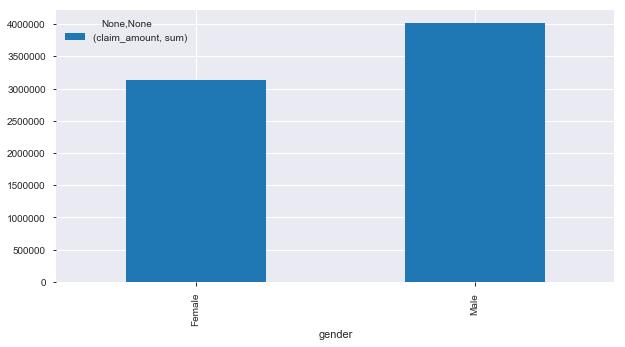

In [44]:
for_plot.plot.bar(figsize=(10,5))

13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart. 

In [45]:
fraudulent_by_agegroup = df.groupby(['Age_Group']).agg({'fraudulent' : ['count']})
fraudulent_by_agegroup

,fraudulent
,count
Age_Group,
Adult,528
Children,245
Invalid,23
Youth,289


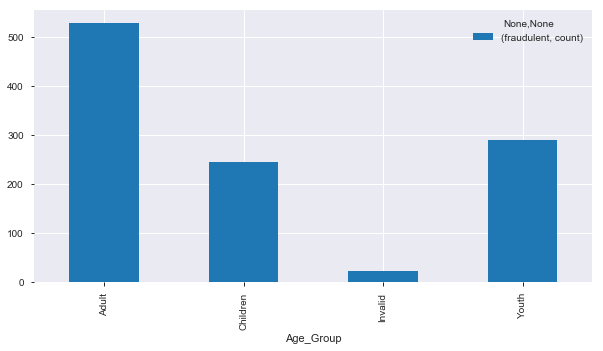

In [46]:
fraudulent_by_agegroup.plot.bar(figsize =(10,5))

14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [47]:
df['claim_date_month'] = df['claim_date'].dt.to_period('M')

In [48]:
monthly_sum = df.groupby(df['claim_date_month']).agg({'claim_amount':['sum']})

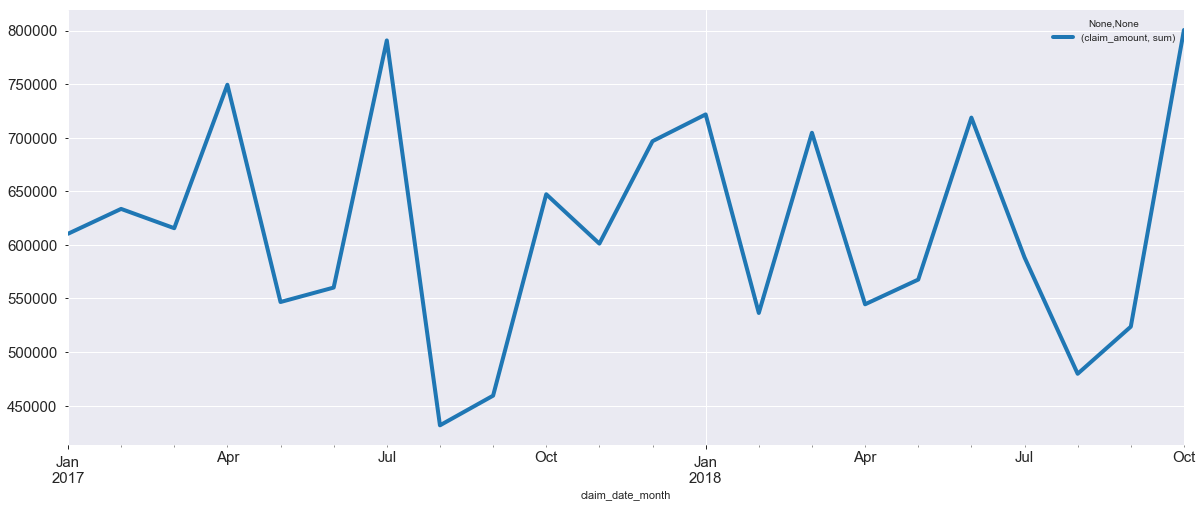

In [49]:
monthly_sum.plot(figsize=(20,8), linewidth = 4, fontsize=15)
plt.xlabel = ('claim_date_month')

15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [50]:
avg_claim_gender_age_fraudulent = df.groupby(['fraudulent', 'gender', 'Age_Group']).agg({'claim_amount': 'mean'})

In [51]:
avg_claim_gender_age_fraudulent.head()

claim_amount
fraudulent gender Age_Group              
No         Female Adult      12121.810136
                  Children   12304.308322
                  Invalid     7362.500000
                  Youth      13041.224839
           Male   Adult      12559.755966

In [52]:
avg_claim_gender_age_fraudulent= avg_claim_gender_age_fraudulent.reset_index()

In [53]:
avg_claim_gender_age_fraudulent.head()

,fraudulent,gender,Age_Group,claim_amount
0,No,Female,Adult,12121.810136
1,No,Female,Children,12304.308322
2,No,Female,Invalid,7362.500000
3,No,Female,Youth,13041.224839
4,No,Male,Adult,12559.755966


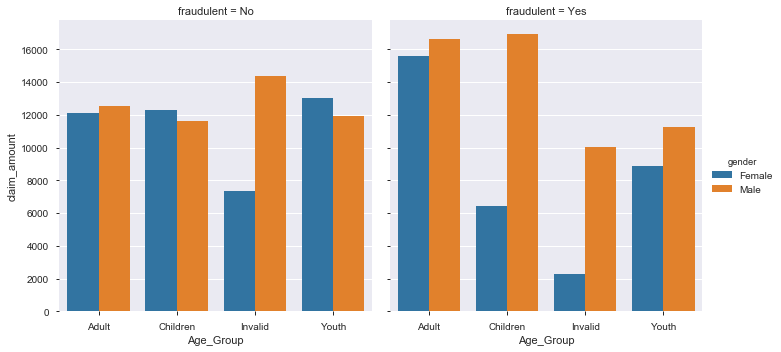

In [54]:
sns.catplot(x='Age_Group', y='claim_amount', hue='gender', col='fraudulent', kind='bar',
             data=avg_claim_gender_age_fraudulent);

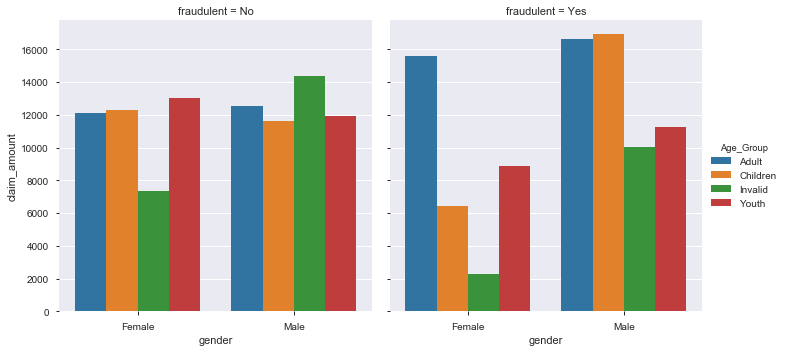

In [55]:
sns.catplot(x="gender", y='claim_amount', hue='Age_Group', col='fraudulent', kind='bar',
             data=avg_claim_gender_age_fraudulent);

Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

 16. Is there any similarity in the amount claimed by males and females?

17. Is there any relationship between age category and segment?

In [68]:
round(df.groupby(['Age_Group', 'Segment']).agg({'claim_amount': 'sum'}))

claim_amount
Age_Group Segment               
Adult     Gold         2546952.0
          Platinum     2135130.0
          Silver       2280257.0
Children  Gold         1041917.0
          Platinum      938059.0
          Silver        876544.0
Invalid   Gold          114927.0
          Platinum      100448.0
          Silver         30445.0
Youth     Gold         1107316.0
          Platinum     1294149.0
          Silver       1061290.0

18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [73]:
df['claim_date_year'] = df['claim_date'].dt.to_period('Y')

In [75]:
round(df.groupby(['claim_date_year']).agg({'claim_amount': 'sum'}))

,claim_amount
claim_date_year,
2017,7341975.0
2018,6185459.0


In [76]:
7341975.0 - 6185459.0

1156516.0

19. Is there any difference between age groups and insurance claims? 

20. Is there any relationship between total number of policy claims and the claimed amount?

In [78]:
round(df.groupby(['total_policy_claims']).agg({'claim_amount': 'sum'}))

,claim_amount
total_policy_claims,
1.000000,9752913.0
1.586977,139498.0
2.000000,1445380.0
3.000000,1111808.0
4.000000,655308.0
5.000000,230317.0
6.000000,142868.0
7.000000,46066.0
8.000000,3278.0
